# Méthode Decends de gradient

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# ETAPE 1

# définition des parametres : pour tester les fonctions, on prendra n2 = 5

# n = nombre de données d'apprentissage 
# n2 = nombres de neurones dans la 2eme couche
# eta = pas dans la méthode du gradient à pas fixe (= learning rate)
# Niter = nombre d'itérations dans la méthode du gradient à pas fixe

n = 100
n2 = 5
eta = 0.3 #learning rate
Niter = 8000
Nepoch = 6000

In [3]:
# ETAPE 2

# génération des données d'apprentissage

X = np.linspace(0,1,n).reshape(1,n)
y = np.sin(2*np.pi*X)

In [4]:
np.shape(X)
np.shape(y)

(1, 100)

In [5]:
# ETAPE 3

# Fonction d'activation
def sigma(z):
    return 1/(1+np.exp(-z))

# Dérivée de la fonction d'activation
def sigmaprime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [6]:
# ETAPE 4

# Initialisation matrices poids et vecteurs biais du réseau de neurones

W2 = np.random.randn(n2,1)
b2 = np.random.randn(n2,1)

W3 = np.random.randn(1,n2)
b3 = np.random.randn(1)


In [7]:
# ETAPE 5

# Calcul de dC/dW2, dC/dW3, dC/db2 et dC/db3 en utilisant
# la méthode de backpropagation

def compute_grad(x,y,W2,W3,b2,b3):
    a1 = x
    # Calculer et stocker
    z2 = np.dot(W2,a1) + b2
    a2 = sigma(z2)

    z3 = np.dot(W3,a2) + b3
    a3 = z3

    #C = np.mean((a3 - y)**2)*0.5
    # Calcul
    delta3 = (a3-y)
    # Calcul
    delta2 = np.dot(W3.T,delta3)*sigmaprime(z2)
    
    dCdW2 = np.dot(delta2,a1.T)
    #dCdW2 = dCdW2.T
    dCdW3 = np.dot(delta3,a2.T)
    #dCdW3 = dCdW2.T
    dCdb2 = delta2
    dCdb3 = delta3

    return dCdW2, dCdW3, dCdb2, dCdb3

In [8]:
# Test de la fonction compute_grad:
# Pour tester, on prendra les matrices suivantes:

W2 = np.array([[0.1],[0.2],[0.7],[0.9],[0.1]])
b2 = np.array([[0.4],[0.5],[0.3],[0.8],[0.2]])

W3 = np.array([[0.4, 0.6, 0.8, 0.7, 0.2]])
b3 = np.array([[2.5]])

xi = np.array([[0.3]])
yi = np.sin(2*np.pi*xi)

dCdW2, dCdW3, dCdb2, dCdb3 = compute_grad(xi,yi,W2,W3,b2,b3)

# Vous devez trouver les résultats suivants:
print('dCdW2=')
print(dCdW2)
print('')
print('dCdW3=')
print(dCdW3)
print('')
print('dCdb2=')
print(dCdb2)
print('')
print('dCdb3=')
print(dCdb3)

dCdW2=
[[0.09472382]
 [0.13767658]
 [0.18598269]
 [0.13201616]
 [0.04893513]]

dCdW3=
[[2.00282269 2.10390657 2.06540843 2.46139695 1.84208145]]

dCdb2=
[[0.31574606]
 [0.45892193]
 [0.6199423 ]
 [0.44005386]
 [0.1631171 ]]

dCdb3=
[[3.30567707]]


In [9]:
# ETAPE 6

# Définition de la fonction coût

def cost(y,y_pred):
    return (1/2*n)* np.linalg.norm(y-y_pred)

In [10]:
# ETAPE 7

# Prediction du modèle

def model_predict(X,W2,W3,b2,b3):
    a1 = X
    # Calculer et stocker
    z2 = W2@a1 + b2
    a2 = sigma(z2)

    z3 = W3@a2 + b3
    a3 = z3
    
    return a3

In [11]:
# Test de la fonction model_predict

print(model_predict(xi,W2,W3,b2,b3))

[[4.25673358]]


In [12]:
# ETAPE 8

# Programme principal : phase d'apprentissage

Cost = np.zeros(Niter)

for j in range(Niter):
    
    # Votre code ici    
    dCdW2 = np.zeros(W2.shape)
    dCdW3 = np.zeros(W3.shape)
    dCdb2 = np.zeros(b2.shape)
    dCdb3 = np.zeros(b3.shape)
    
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[j] = cost(y,y_pred)
    for i in range(n):
        
        # Votre code ici
        xi = X[0][i]
        yi = y[0][i]
        gW2, gW3, gb2, gb3 = compute_grad(xi,yi,W2,W3,b2,b3)
        dCdW2 += gW2
        dCdW3 += gW3
        dCdb2 += gb2
        dCdb3 += gb3
        
    # Actualisation des paramètres    
    W2 = W2 - (eta/n)*dCdW2
    W3 = W3 - (eta/n)*dCdW3
    b2 = b2 - (eta/n)*dCdb2
    b3 = b3 - (eta/n)*dCdb3

In [13]:
y_pred = model_predict(X,W2,W3,b2,b3)
y_pred

array([[ 0.22196804,  0.25646699,  0.29101187,  0.32556099,  0.36006844,
         0.39448376,  0.42875155,  0.46281106,  0.49659579,  0.53003302,
         0.56304334,  0.59554023,  0.6274295 ,  0.65860885,  0.68896739,
         0.71838515,  0.7467327 ,  0.7738707 ,  0.7996497 ,  0.82390983,
         0.8464808 ,  0.86718191,  0.88582243,  0.90220202,  0.91611164,
         0.9273347 ,  0.93564857,  0.9408267 ,  0.94264106,  0.94086524,
         0.93527811,  0.92566808,  0.91183788,  0.89361002,  0.87083261,
         0.84338565,  0.81118743,  0.77420103,  0.73244049,  0.68597649,
         0.63494111,  0.57953142,  0.5200115 ,  0.45671268,  0.39003169,
         0.32042658,  0.24841048,  0.17454321,  0.09942097,  0.02366453,
        -0.05209361, -0.12722261, -0.20110659, -0.27315727, -0.34282543,
        -0.40961072, -0.47306952, -0.53282064, -0.5885488 , -0.64000588,
        -0.68701026, -0.72944433, -0.76725056, -0.80042648, -0.82901885,
        -0.85311738, -0.87284824, -0.88836766, -0.8

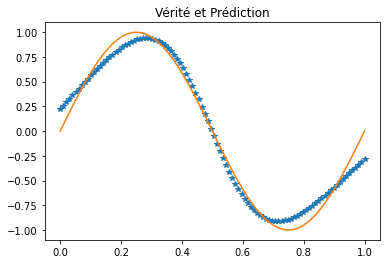

In [14]:
plt.figure()
plt.plot(X[0],y_pred[0], '*', label= "Prediction")
plt.plot(X[0],y[0], label="Verité" )
plt.title('Vérité et Prédiction')
plt.show()

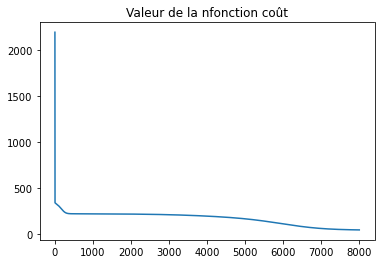

In [15]:
plt.figure()
plt.plot(Cost)
plt.title('Valeur de la nfonction coût')
plt.show()